<a href="https://colab.research.google.com/github/Nissun662/Data-Visual/blob/main/Quiz29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Processing and Visualization
#Nishan Sunar
250662


#Today's Assignmnet:
1. Explain the difference between standard error and confidence intervals.
2. Use the workout data and graph the average calories by workout type and include the 95% confidence interval.

The confidence interval is equal to two margins of error and the margin of error is equal to about 2 standard errors.  The standard error typically means the standard deviation divided by the square root of the sample size.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')
df.head(10)

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88
5,5,2022-01-01,Outdoor Cycling,5.47,117,144,NaN,2.20,43.47,291.67,...,NaN,NaN,142.0,177.0,107,44,45,15,57,39
6,6,2022-01-01,Indoor Cycling,6.28,66,378,NaN,10.65,23.83,253.84,...,NaN,NaN,85.0,90.0,80,34,32,0,44,23
7,7,2022-01-01,Outdoor Running,2.94,26,430,7618.0,10.59,131.93,334.72,...,27:44,06:15,145.0,190.0,100,23,0,71,18,3
8,8,2022-01-01,Trail Run,2.87,26,465,2790.0,32.92,21.42,341.17,...,25:50,06:20,142.0,188.0,96,2,0,80,46,13
9,9,2022-01-01,Pool Swimming,3.91,23,99,NaN,33.15,169.30,206.97,...,NaN,NaN,132.5,175.0,90,22,20,15,28,20


In [5]:
dfgrouped = df.groupby('workout_type').agg(['mean','std', 'count'])
dfgrouped.head()

Unnamed: 0                    distance                  \
                       mean         std count      mean       std count   
workout_type                                                              
Cricket          478.580645  286.817937    93  5.283763  2.847169    93   
Freestyle        502.312500  295.745884    96  5.044792  2.799025    96   
Indoor Cycling   570.412500  304.768669    80  5.259000  2.413489    80   
Open Water       469.824176  284.556442    91  5.180659  2.767597    91   
Outdoor Cycling  463.941176  278.997114    85  5.444000  2.497849    85   

                      time                     calories  ... aerobic(%)  \
                      mean        std count        mean  ...      count   
workout_type                                             ...              
Cricket          68.430108  26.748181    93  307.548387  ...         93   
Freestyle        70.822917  29.001268    96  278.552083  ...         96   
Indoor Cycling   70.025000  29.268714    80  280.450000  ...         80   
Open Water       69.241758  30.018639    91  296.747253  ...         91   
Outdoor Cycling  73.882353  30.630055    85  299.129412  ...         85   

                anaerobic(%)            intensive(%)                   \
                        mean  std count         mean        std count   
workout_type                                                            
Cricket                 10.0  0.0    93    36.924731  17.329440    93   
Freestyle                2.0  0.0    96    37.635417  17.391540    96   
Indoor Cycling           0.0  0.0    80    39.600000  18.815291    80   
Open Water               5.0  0.0    91    38.153846  17.512486    91   
Outdoor Cycling         15.0  0.0    85    33.470588  19.136470    85   

                  light(%)                   
                      mean        std count  
workout_type                                 
Cricket          58.849462  27.513217    93  
Freestyle        49.562500  29.580510    96  
Indoor Cycling   51.100000  27.444582    80  
Open Water       50.252747  29.897452    91  
Outdoor Cycling  49.247059  28.542327    85  

[5 rows x 48 columns]

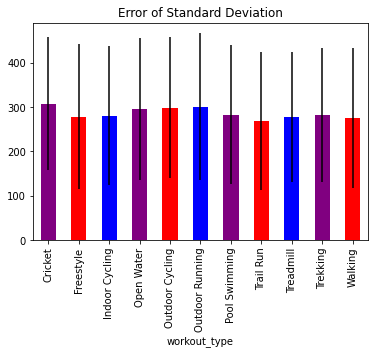

In [15]:
dfgrouped.calories.plot.bar(y = 'mean',
                            yerr = 'std',
                            legend = False, color = ['purple','red', 'blue'],
                            title = "Error of Standard Deviation")

In [8]:
import numpy as np
from scipy.stats import t

def SE(std,n):
  return std/np.sqrt(n)

dfgroupedcalories = dfgrouped.calories

dfgroupedcalories['SE'] = dfgroupedcalories.apply(lambda x: SE(x['std'],x['count']), axis = 1)

dfgroupedcalories.loc[:,'95%'] = dfgroupedcalories.loc[:,'SE']*t.ppf(.975,49)

dfgroupedcalories

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,mean,std,count,SE,95%
workout_type,,,,,
Cricket,307.548387,149.950609,93,15.549154,31.247194
Freestyle,278.552083,163.703768,96,16.707946,33.575874
Indoor Cycling,280.450000,156.633322,80,17.512138,35.191958
Open Water,296.747253,160.068499,91,16.779738,33.720146
Outdoor Cycling,299.129412,158.731263,85,17.216823,34.598501
Outdoor Running,301.469136,165.725080,81,18.413898,37.004113
Pool Swimming,283.414894,157.576703,94,16.252796,32.661216
Trail Run,267.966667,155.748533,90,16.417337,32.991874
Treadmill,278.142857,146.963352,98,14.845540,29.833230


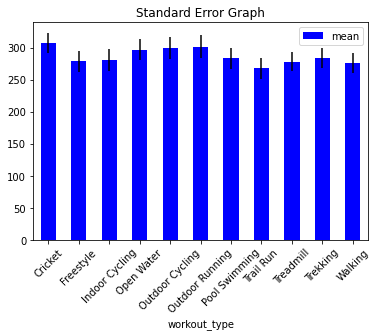

In [21]:
dfgroupedcalories.plot.bar(y = 'mean', yerr = 'SE', title = 'Standard Error Graph', color = ['blue'],rot = 45)

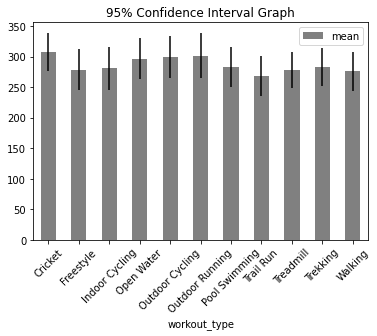

In [27]:
dfgroupedcalories.plot.bar(y = 'mean', yerr = '95%', title = '95% Confidence Interval Graph', color=['Grey'], rot = 45)